In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [122]:
csv_data = pd.read_csv('training_data_all.csv')
csv_data.head(5)

,Unnamed: 0,Win_team,Team_1_pitcher_WHIP,Team_1_pitcher_piAn,Team_1_pitcher_piHom,Team_1_pitcher_sam,Team_1_pitcher_ball,Team_1_pitcher_ja,Team_2_pitcher_WHIP,Team_2_pitcher_piAn,...,Team_1_hitter_chul,Team_1_hitter_do,Team_2_hitter_hit,Team_2_hitter_homrun,Team_2_hitter_sam,Team_2_hitter_ball,Team_2_hitter_deg,Team_2_hitter_ta,Team_2_hitter_chul,Team_2_hitter_do
0,0,1,1.17,0.234273,0.026030,0.607143,0.205357,4.178571,1.40,0.223785,...,0.261251,0.425926,0.297333,0.038541,0.184575,0.019147,0.153753,0.168974,0.308273,0.682200
1,1,0,1.23,0.245774,0.014304,0.826580,0.205294,3.889789,1.32,0.236887,...,0.288868,0.431263,0.283333,0.028122,0.208332,0.009366,0.140507,0.148764,0.288695,0.316402
2,2,0,1.58,0.269179,0.024226,0.600000,0.363636,4.690909,1.31,0.250307,...,0.244749,0.485862,0.258444,0.038210,0.203828,0.022838,0.147275,0.125598,0.271322,0.338624
3,3,0,1.32,0.258782,0.024590,0.740557,0.223658,3.489066,1.69,0.281099,...,0.294911,0.348744,0.283111,0.028662,0.173910,0.014732,0.143559,0.140787,0.290519,0.725853
4,4,1,1.30,0.249373,0.023810,0.833779,0.235168,3.800107,1.29,0.234310,...,0.305814,0.472489,0.287889,0.034753,0.208439,0.031419,0.147032,0.157054,0.305711,0.650661


In [123]:
drop_column = list(csv_data.columns)[0]
print(drop_column)

csv_data.drop(drop_column, axis=1, inplace=True)

Unnamed: 0


In [124]:
print(csv_data.dtypes)

Win_team                  int64
Team_1_pitcher_WHIP     float64
Team_1_pitcher_piAn     float64
Team_1_pitcher_piHom    float64
Team_1_pitcher_sam      float64
Team_1_pitcher_ball     float64
Team_1_pitcher_ja       float64
Team_2_pitcher_WHIP     float64
Team_2_pitcher_piAn     float64
Team_2_pitcher_piHom    float64
Team_2_pitcher_sam      float64
Team_2_pitcher_ball     float64
Team_2_pitcher_ja       float64
Team_1_hitter_hit       float64
Team_1_hitter_homrun    float64
Team_1_hitter_sam       float64
Team_1_hitter_ball      float64
Team_1_hitter_deg       float64
Team_1_hitter_ta        float64
Team_1_hitter_chul      float64
Team_1_hitter_do        float64
Team_2_hitter_hit       float64
Team_2_hitter_homrun    float64
Team_2_hitter_sam       float64
Team_2_hitter_ball      float64
Team_2_hitter_deg       float64
Team_2_hitter_ta        float64
Team_2_hitter_chul      float64
Team_2_hitter_do        float64
dtype: object


In [125]:
print(csv_data.max())

Win_team                  1.000000
Team_1_pitcher_WHIP       5.000000
Team_1_pitcher_piAn       0.470588
Team_1_pitcher_piHom      0.153846
Team_1_pitcher_sam        1.363636
Team_1_pitcher_ball       2.619048
Team_1_pitcher_ja        31.500000
Team_2_pitcher_WHIP      18.000000
Team_2_pitcher_piAn       0.571429
Team_2_pitcher_piHom      0.142857
Team_2_pitcher_sam       10.000000
Team_2_pitcher_ball      30.000000
Team_2_pitcher_ja       270.000000
Team_1_hitter_hit         0.323556
Team_1_hitter_homrun      0.053775
Team_1_hitter_sam         0.295126
Team_1_hitter_ball        0.038710
Team_1_hitter_deg              inf
Team_1_hitter_ta          0.196406
Team_1_hitter_chul        0.334362
Team_1_hitter_do          0.883333
Team_2_hitter_hit         0.327556
Team_2_hitter_homrun      0.058522
Team_2_hitter_sam         0.298296
Team_2_hitter_ball        0.032450
Team_2_hitter_deg              inf
Team_2_hitter_ta          0.194789
Team_2_hitter_chul        0.338154
Team_2_hitter_do    

In [128]:
# inf 를 NaN 값으로 바꾼 후 NaN값을 평균값으로 치환하는 방식.
# 바로 평균값 mean을 사용하는 경우 inf를 포함하여 평균값을 계산하기 때문에
csv_data['Team_1_hitter_deg'].replace(np.inf, np.nan, inplace=True)
csv_data['Team_2_hitter_deg'].replace(np.inf, np.nan, inplace=True)

csv_data['Team_1_hitter_deg'].replace(np.nan, csv_data['Team_1_hitter_deg'].mean() * 0.7, inplace=True)
csv_data['Team_2_hitter_deg'].replace(np.nan, csv_data['Team_2_hitter_deg'].mean() * 0.7, inplace=True)

In [129]:
print(csv_data.max())

Win_team                  1.000000
Team_1_pitcher_WHIP       5.000000
Team_1_pitcher_piAn       0.470588
Team_1_pitcher_piHom      0.153846
Team_1_pitcher_sam        1.363636
Team_1_pitcher_ball       2.619048
Team_1_pitcher_ja        31.500000
Team_2_pitcher_WHIP      18.000000
Team_2_pitcher_piAn       0.571429
Team_2_pitcher_piHom      0.142857
Team_2_pitcher_sam       10.000000
Team_2_pitcher_ball      30.000000
Team_2_pitcher_ja       270.000000
Team_1_hitter_hit         0.323556
Team_1_hitter_homrun      0.053775
Team_1_hitter_sam         0.295126
Team_1_hitter_ball        0.038710
Team_1_hitter_deg         0.258379
Team_1_hitter_ta          0.196406
Team_1_hitter_chul        0.334362
Team_1_hitter_do          0.883333
Team_2_hitter_hit         0.327556
Team_2_hitter_homrun      0.058522
Team_2_hitter_sam         0.298296
Team_2_hitter_ball        0.032450
Team_2_hitter_deg         0.216687
Team_2_hitter_ta          0.194789
Team_2_hitter_chul        0.338154
Team_2_hitter_do    

In [157]:
train_data = csv_data.drop(['Win_team'] ,axis=1)
target_data = csv_data['Win_team']

print(train_data.head(5))
print(target_data.head(5))

   Team_1_pitcher_WHIP  Team_1_pitcher_piAn  Team_1_pitcher_piHom  \
0                 1.17             0.234273              0.026030   
1                 1.23             0.245774              0.014304   
2                 1.58             0.269179              0.024226   
3                 1.32             0.258782              0.024590   
4                 1.30             0.249373              0.023810   

   Team_1_pitcher_ball  Team_1_pitcher_ja  Team_2_pitcher_WHIP  \
0             0.205357           4.178571                 1.40   
1             0.205294           3.889789                 1.32   
2             0.363636           4.690909                 1.31   
3             0.223658           3.489066                 1.69   
4             0.235168           3.800107                 1.29   

   Team_2_pitcher_piAn  Team_2_pitcher_piHom  Team_2_pitcher_ball  \
0             0.223785              0.025575             0.429688   
1             0.236887              0.021997      

In [158]:
csv_data.describe()

,Win_team,Team_1_pitcher_WHIP,Team_1_pitcher_piAn,Team_1_pitcher_piHom,Team_1_pitcher_sam,Team_1_pitcher_ball,Team_1_pitcher_ja,Team_2_pitcher_WHIP,Team_2_pitcher_piAn,Team_2_pitcher_piHom,...,Team_1_hitter_chul,Team_1_hitter_do,Team_2_hitter_hit,Team_2_hitter_homrun,Team_2_hitter_sam,Team_2_hitter_ball,Team_2_hitter_deg,Team_2_hitter_ta,Team_2_hitter_chul,Team_2_hitter_do
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.538089,1.450450,0.247731,0.024530,0.764418,0.355248,4.772453,1.457424,0.247757,0.024934,...,0.285025,0.538946,0.276603,0.028329,0.200476,0.016351,0.147027,0.140535,0.285494,0.540203
std,0.498633,0.265517,0.029482,0.010899,0.160601,0.154988,1.750260,0.428940,0.030826,0.011669,...,0.019791,0.130077,0.019386,0.007936,0.024186,0.004653,0.017987,0.019459,0.019899,0.133072
min,0.000000,0.810000,0.103448,0.000000,0.000000,0.000000,1.184211,0.810000,0.000000,0.000000,...,0.208897,0.096296,0.194833,0.008715,0.123124,0.005061,0.092302,0.081619,0.202779,0.079453
25%,0.000000,1.300000,0.226316,0.018405,0.664835,0.251256,3.767149,1.280000,0.226316,0.018182,...,0.272022,0.457617,0.263889,0.022660,0.184750,0.013151,0.135444,0.127367,0.272835,0.462547
50%,1.000000,1.430000,0.247606,0.023729,0.766488,0.333033,4.603448,1.430000,0.246809,0.023739,...,0.287239,0.557298,0.278444,0.027922,0.198959,0.016121,0.147362,0.141313,0.287107,0.559273
75%,1.000000,1.570000,0.264108,0.030242,0.875764,0.426829,5.338491,1.580000,0.264214,0.030351,...,0.298989,0.628167,0.290667,0.033690,0.216292,0.019195,0.157840,0.153491,0.299608,0.632079
max,1.000000,5.000000,0.470588,0.153846,1.363636,2.619048,31.500000,18.000000,0.571429,0.142857,...,0.334362,0.883333,0.327556,0.058522,0.298296,0.032450,0.216687,0.194789,0.338154,0.888624


In [159]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, 
                                                    test_size=0.25 , random_state= 156)

print(X_train.shape, X_test.shape)

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

(2166, 26) (722, 26)


In [160]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
        }


rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv =3, n_jobs = -1)
grid_cv.fit(train_scaled , y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

#rf_clf.fit(train_scaled , y_train)
#scores = cross_validate(rf_clf, train_scaled, y_train, return_train_score=True, n_jobs=-1)
#print(np.mean(scores['train_score']), np.mean(scores['test_score']))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.6108


In [161]:
from scipy.stats import uniform, randint

params = {'n_estimators': randint(10, 200),
          'max_depth': randint(5, 20),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(rf_clf, params, n_iter=200, n_jobs=-1, random_state=0)
gs.fit(train_scaled, y_train)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_

print(dt.score(test_scaled, y_test))

{'max_depth': 19, 'min_samples_leaf': 22, 'min_samples_split': 13, 'n_estimators': 65}
0.6071018826960122
0.6135734072022161


In [162]:
from sklearn.model_selection import cross_validate

rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth =5, min_samples_leaf = 22, min_samples_split = 16, n_estimators = 35)
rf_clf.fit(train_scaled , y_train)
scores = cross_validate(rf_clf, train_scaled, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.6881350206359634 0.5978757143921414


In [163]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth =5, min_samples_leaf = 22, min_samples_split = 16, n_estimators = 35)
rf_clf.fit(X_train , y_train)

train_pred = rf_clf.predict(X_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_train , train_pred)
print('랜덤 포레스트 Train 정확도: {0:.4f}'.format(accuracy))

accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 TEST 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 Train 정확도: 0.6768
랜덤 포레스트 TEST 정확도: 0.6163


In [164]:
# 그림이 바로 확인할 수 있게 함
%matplotlib inline

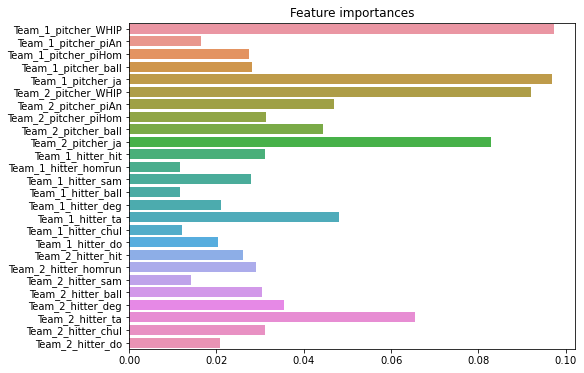

In [165]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()